In [ ]:
# Gerekli paketleri yükleme
from google.colab import drive
drive.mount('/content/drive')

zip_adres = "/content/drive/My Drive/archive.zip"
!cp "{zip_adres}" .

!unzip -q archive.zip
#!rm archive.zip

!pip install timm
!pip install torch torchvision
!pip install numpy pandas matplotlib seaborn scikit-learn

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset, random_split
from timm import create_model
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, matthews_corrcoef
from PIL import Image
import torch
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import KFold
import numpy as np
class CustomDataset(Dataset):
    def __init__(self, filepaths, labels, transform=None):
        self.filepaths = filepaths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.filepaths)

    def __getitem__(self, idx):
        img_path = self.filepaths[idx]
        image = Image.open(img_path).convert("RGB")
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label

# K-fold çapraz doğrulama
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_index, val_index) in enumerate(kf.split(all_filepaths)):
    print(f"Fold {fold + 1}")

    train_filepaths = np.array(all_filepaths)[train_index]
    train_labels = np.array(all_labels)[train_index]
    val_filepaths = np.array(all_filepaths)[val_index]
    val_labels = np.array(all_labels)[val_index]

    train_dataset = CustomDataset(train_filepaths, train_labels, transform=transform)
    val_dataset = CustomDataset(val_filepaths, val_labels, transform=transform)

    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

    model = LeViTModel(num_classes=num_classes).to(device)
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

    num_epochs = 3
    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        train_loss = train(model, train_loader, criterion, optimizer, device)
        val_loss, val_accuracy, val_preds, val_labels = validate(model, val_loader, criterion, device)
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        print(f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")

# Veri seti yolları
data_dir = '/content/drive/MyDrive/MAKİNE ÖĞRENMESİ VERİLER/train'
categories = ['Çamurlu Zemin_TRAIN', 'KARSTİK ZEMİN_TRAIN', 'Kumlu Zemin_TRAIN', 'Sulak Zemin_TRAIN']


Mounted at /content/drive
cp: cannot stat '/content/drive/My Drive/archive.zip': No such file or directory
unzip:  cannot find or open archive.zip, archive.zip.zip or archive.zip.ZIP.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 21.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.

NameError: name 'all_filepaths' is not defined

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV dosyasını oku
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/LEVİT DEĞERLER.csv')


# Her katlama (fold) için loss ve accuracy değerlerini al
# Her epoch için loss ve accuracy değerlerini al
# Her katlama (fold) için loss ve accuracy değerlerini al
folds = df['Train Loss'].unique()
for fold in folds:
    fold_df = df[df['fold'] == fold]
    epochs = fold_df['epoch']
    train_loss = fold_df['train_loss']
    val_loss = fold_df['val_loss']
    val_accuracy = fold_df['val_accuracy']

    # Loss grafiği
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, train_loss, label='Train Loss', color='r')
    plt.plot(epochs, val_loss, label='Val Loss', color='b')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Fold {fold} - Epocha Göre Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Accuracy grafiği
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, val_accuracy, label='Val Accuracy', color='g')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(f'Fold {fold} - Epocha Göre Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()


KeyError: 'Train Loss'

In [ ]:
import pandas as pd

# Verileri DataFrame'e dönüştürme
data = {
    'Fold': [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5],
    'Epoch': [1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1],
    'Train Loss': [1.0107, 0.5249, 0.3237, 1.0157, 0.5157, 0.2875, 1.0115, 0.5315, 0.2959, 1.0169, 0.5656, 0.3415, 0.9998],
    'Val Loss': [1.9434, 1.5394, 0.2748, 1.3889, 0.3887, 0.2901, 0.6597, 0.3823, 1.8426, 0.7364, 1.0361, 0.4065, 0.6771],
    'Val Accuracy': [0.7867, 0.8706, 0.9079, 0.7712, 0.8768, 0.9068, 0.7865, 0.8881, 0.9181, 0.7130, 0.8964, 0.9026, 0.7803]
}
df = pd.DataFrame(data)

# DataFrame'i CSV dosyasına yazma
df.to_csv('/content/drive/MyDrive/Colab Notebooks/veriler.csv', index=False)

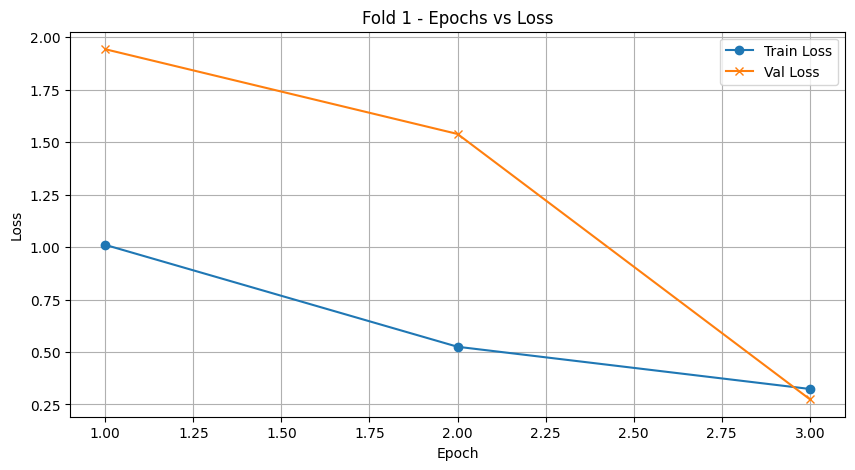

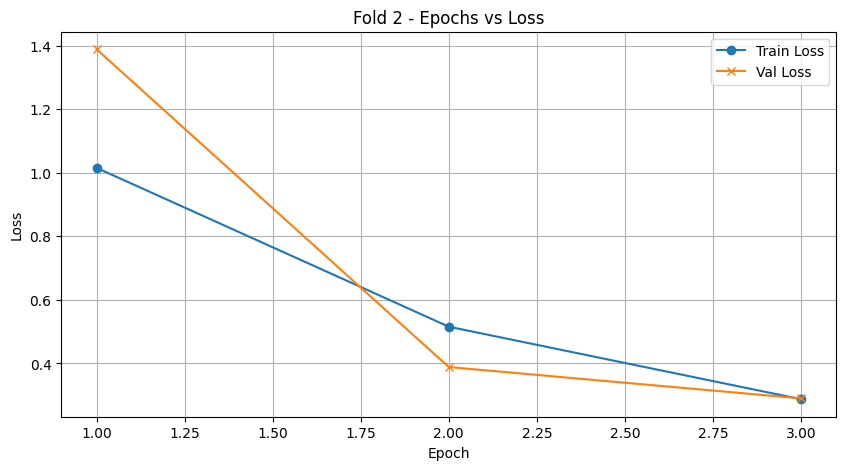

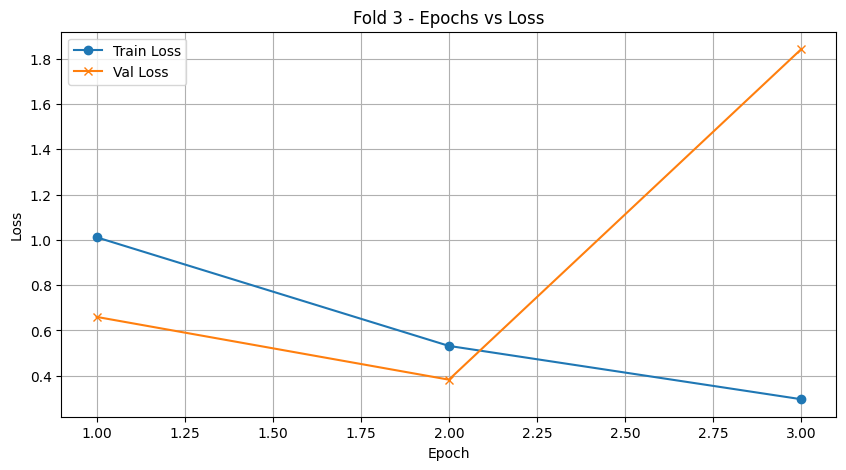

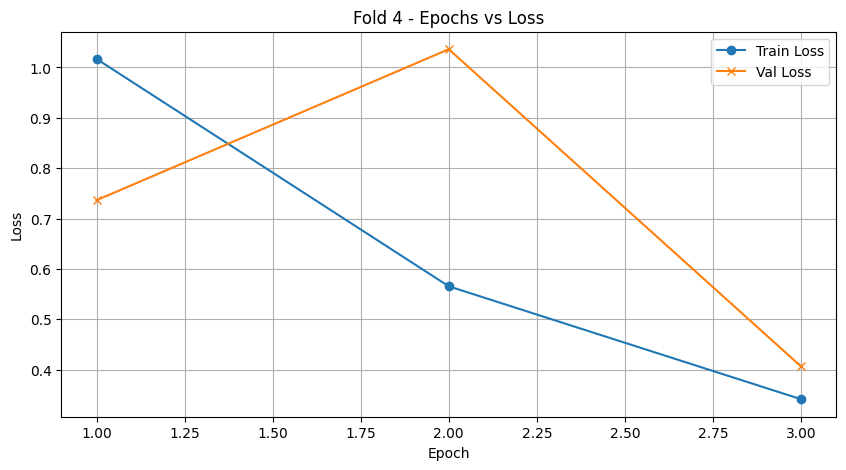

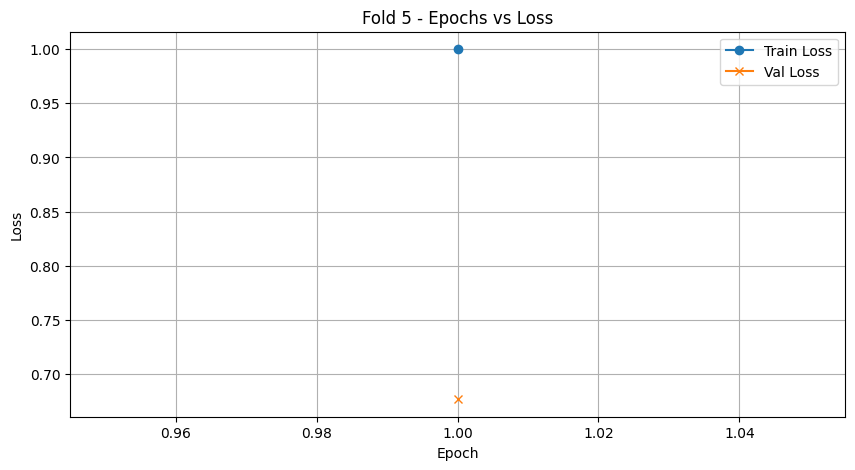

In [ ]:
import matplotlib.pyplot as plt

data = {
    'Fold': [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5],
    'Epoch': [1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1],
    'Train Loss': [1.0107, 0.5249, 0.3237, 1.0157, 0.5157, 0.2875, 1.0115, 0.5315, 0.2959, 1.0169, 0.5656, 0.3415, 0.9998],
    'Val Loss': [1.9434, 1.5394, 0.2748, 1.3889, 0.3887, 0.2901, 0.6597, 0.3823, 1.8426, 0.7364, 1.0361, 0.4065, 0.6771],
    'Val Accuracy': [0.7867, 0.8706, 0.9079, 0.7712, 0.8768, 0.9068, 0.7865, 0.8881, 0.9181, 0.7130, 0.8964, 0.9026, 0.7803]
}

# Her fold için loss değerlerini ve epoch sayısını ayırma
folds = sorted(set(data['Fold']))
for fold in folds:
    fold_data = {k: [v for i, v in enumerate(data[k]) if data['Fold'][i] == fold] for k in data}
    epochs = fold_data['Epoch']
    train_losses = fold_data['Train Loss']
    val_losses = fold_data['Val Loss']

    # Loss grafiği oluşturma
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, train_losses, label='Train Loss', marker='o')
    plt.plot(epochs, val_losses, label='Val Loss', marker='x')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Fold {fold} - Epochs vs Loss')
    plt.legend()
    plt.grid(True)
    plt.show()


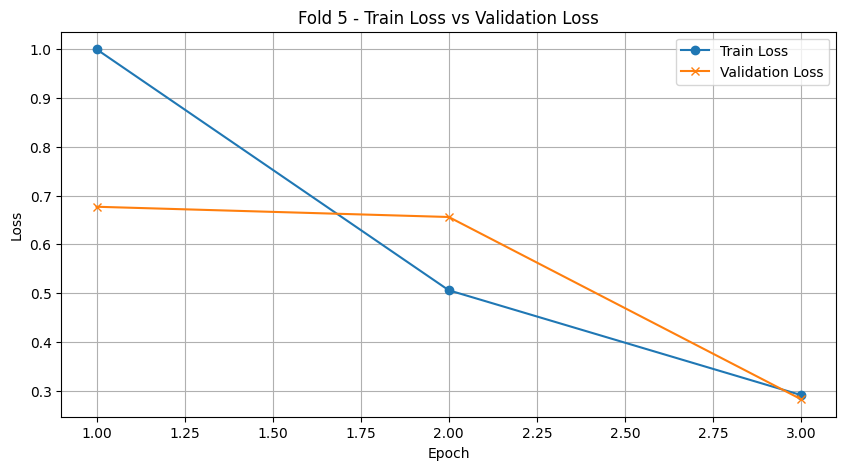

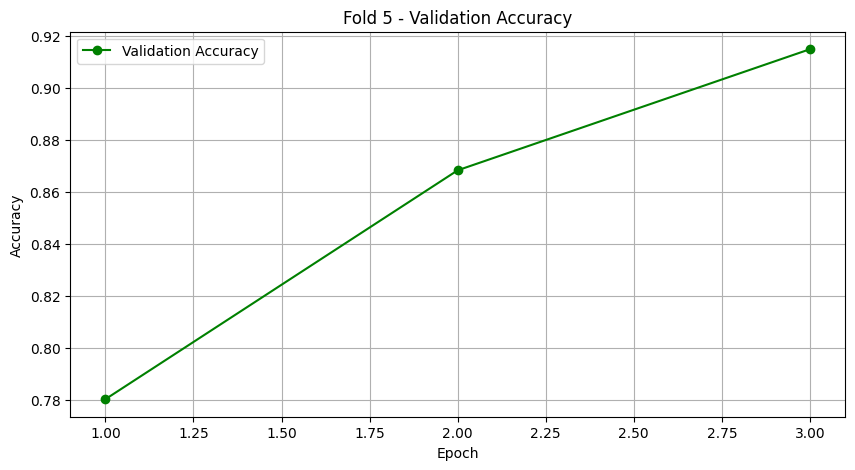

In [ ]:
import matplotlib.pyplot as plt

# Verileri dictionary'den çıkar
fold = 5
train_loss = [0.9998, 0.5060, 0.2913]
val_loss = [0.6771, 0.6561, 0.2828]
val_accuracy = [0.7803, 0.8684, 0.9150]
epochs = range(1, len(train_loss) + 1)

# Train Loss ve Validation Loss grafiği
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_loss, label='Train Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='x')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title(f'Fold {fold} - Train Loss vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# Validation Accuracy grafiği
plt.figure(figsize=(10, 5))
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='o', color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title(f'Fold {fold} - Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()
